In [ ]:
!conda install -c conda-forge tensorflow

KNN Regressor - MSE: 160.46, R-squared: -0.27
Random Forest Regressor - MSE: 176.44, R-squared: -0.39
Best k (from cross-validation): 1 with Mean Squared Error: 262.86


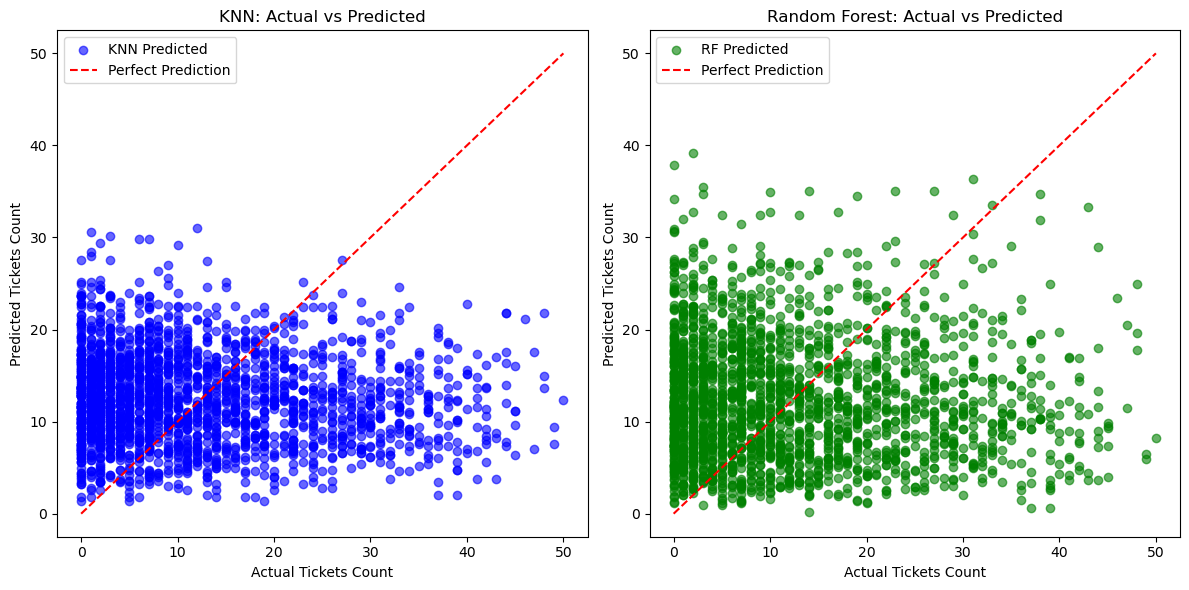

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Step 1: Read and Concatenate the Files
file_1 = pd.read_csv('modified.csv')
file_2 = pd.read_csv('modified_1.csv')

# Concatenate the two dataframes
df = pd.concat([file_1, file_2], ignore_index=True)

# Step 2: Select the relevant columns (bus_stop_id and route_number)
X = df[['bus_stop_id', 'route_number']]

# Step 3: Target variable is continuous, so we use tickets_count for regression
y = df['tickets_count']

# Step 4: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features (important for KNN and other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply K-Nearest Neighbors Regressor (since tickets_count is continuous)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 7: Evaluate the KNN model
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate using Mean Squared Error (MSE) and R-squared score
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - MSE: {mse_knn:.2f}, R-squared: {r2_knn:.2f}")

# Step 8: Optionally, try a Random Forest Regressor for comparison
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")

# Step 9: Cross-validation for finding the best number of neighbors (optional)
neighbors_range = range(1, 21)
scores = []

for k in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # Use 5-fold cross-validation
    scores.append(score.mean())

best_k = neighbors_range[scores.index(min(scores))]
print(f"Best k (from cross-validation): {best_k} with Mean Squared Error: {-min(scores):.2f}")

# Step 10: Plot the actual vs predicted values for both models
plt.figure(figsize=(12, 6))

# Plot for KNN
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.6, label='KNN Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual Tickets Count')
plt.ylabel('Predicted Tickets Count')
plt.legend()

# Plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='RF Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Tickets Count')
plt.ylabel('Predicted Tickets Count')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")


Random Forest Regressor - MSE: 176.44, R-squared: -0.39
